In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import pickle
import IPython.display as ipd
%matplotlib inline

In [2]:
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


Training 4 NN: narrow temporal, narrow spectral, broad temporal and broad spectral

## Narrow temporal

In [3]:
data = pd.read_pickle("../Data/Guitar/acc-onset-data.pkl")
data = data.reset_index(drop=True)

In [4]:
%run ../Utilities/Utilities.ipynb

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

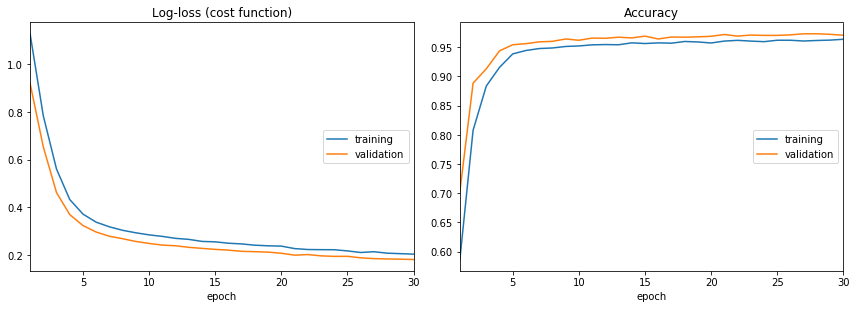

Log-loss (cost function):
training   (min:    0.205, max:    1.126, cur:    0.205)
validation (min:    0.182, max:    0.919, cur:    0.182)

Accuracy:
training   (min:    0.587, max:    0.964, cur:    0.964)
validation (min:    0.703, max:    0.973, cur:    0.970)
Train score: 0.16967361621425867
Train accuracy: 0.9752228027043639
Validation score: 0.1823091791609569
Validation accuracy: 0.9704978488014752


In [6]:
inputs = Input(shape=(300,))
hidden1 = Dense(128, activation="relu", kernel_regularizer=l1(0.0003))(inputs)
dropout_1 = Dropout(0.3)(hidden1)
hidden2 = Dense(64, activation="relu")(dropout_1)
preds = Dense(1, activation="sigmoid")(hidden2)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=30, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

In [7]:
model.save_weights('Guitar_onset_300_NN_weights.h5')
with open('Guitar_onset_300_NN_architecture.json', 'w') as f:
    f.write(model.to_json())

In [54]:
y = load_file("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", 8000)

In [55]:
results = apply_window(y, size=300, disp=100, function=model.predict, convert=True)

In [56]:
results = np.array(results)

In [57]:
final = []
for x in results:
    final.append([x[0], x[1][0][0]])
final = np.array(final)

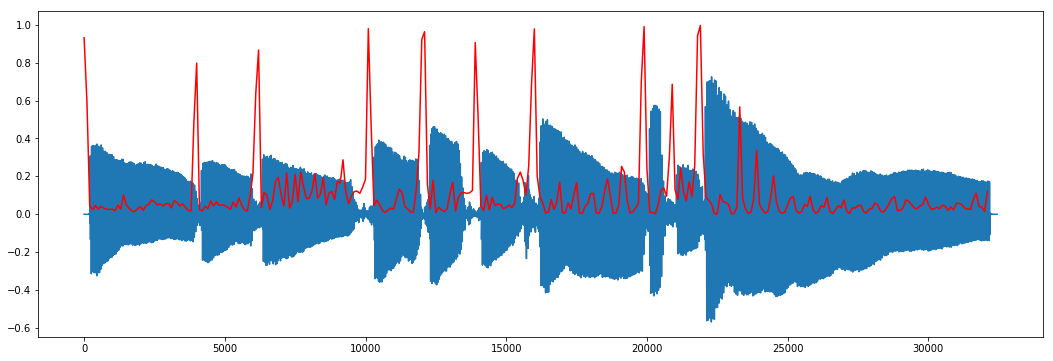

In [58]:
plt.figure(figsize=(18,6))
plt.plot(y*3)
plt.plot(final[:,0], final[:,1], 'r')

## Broad temporal

In [4]:
data = pd.read_pickle("../Data/Guitar/acc-onset-data-600.pkl")
data = data.reset_index(drop=True)

In [5]:
%run ../Utilities/Utilities.ipynb

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

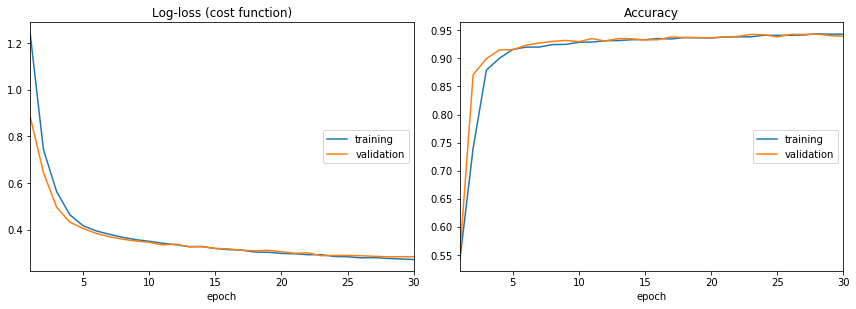

Log-loss (cost function):
training   (min:    0.271, max:    1.240, cur:    0.271)
validation (min:    0.283, max:    0.884, cur:    0.283)

Accuracy:
training   (min:    0.542, max:    0.944, cur:    0.943)
validation (min:    0.553, max:    0.943, cur:    0.940)
Train score: 0.22540206750181946
Train accuracy: 0.964333734342934
Validation score: 0.2832828763015136
Validation accuracy: 0.9397112935351273


In [7]:
inputs = Input(shape=(600,))
hidden1 = Dense(128, activation="relu", kernel_regularizer=l1(0.0003))(inputs)
dropout_1 = Dropout(0.3)(hidden1)
hidden2 = Dense(64, activation="relu")(dropout_1)
preds = Dense(1, activation="sigmoid")(hidden2)

model2 = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, batch_size=None, epochs=30, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model2.evaluate(X_train, y_train, verbose=0)
score_val = model2.evaluate(X_val, y_val, verbose=0)

score_test = model2.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

In [8]:
model2.save_weights('Guitar_onset_600_NN_weights.h5')
with open('Guitar_onset_600_NN_architecture.json', 'w') as f:
    f.write(model2.to_json())

In [45]:
y = load_file("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", 8000)

In [46]:
results = apply_window(y, size=600, disp=100, function=model2.predict, convert=True)
results = np.array(results)

In [47]:
final2 = []
for x in results:
    final2.append([x[0], x[1][0][0]])
final2 = np.array(final2)

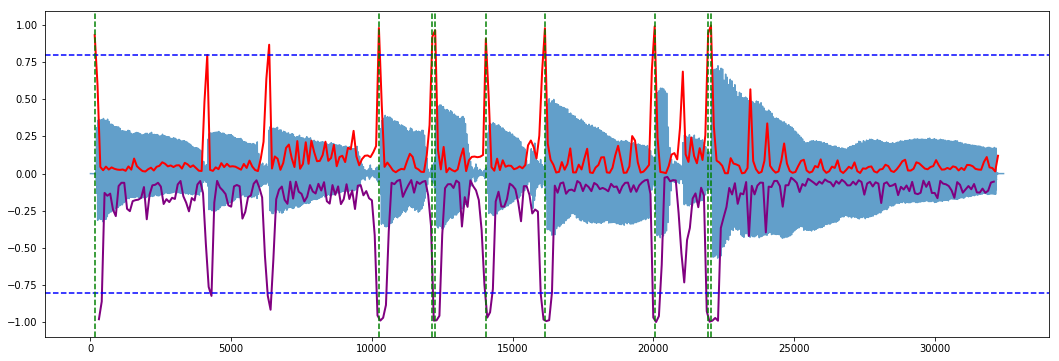

In [59]:
plt.figure(figsize=(18,6))
plt.plot(y*3, alpha=.7)
plt.plot(final[:,0]+150, final[:,1], 'r', linewidth=2)
plt.plot(final2[:,0]+300, final2[:,1]*(-1), 'purple', linewidth=2)
plt.axhline(y=0.8, color="b", linestyle='--')
plt.axhline(y=-0.8, color="b", linestyle='--')
for narrow, broad in zip(final, final2):
    if (broad[1] >= 0.8) and (narrow[1] >= 0.8):
        plt.axvline(x=narrow[0]+150, color='g', linestyle='--')

## Narrow spectral

In [8]:
data = pd.read_pickle("../Data/Guitar/acc-onset-data-spectral.pkl")
data = data.reset_index(drop=True)

In [9]:
%run ../Utilities/Utilities.ipynb

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

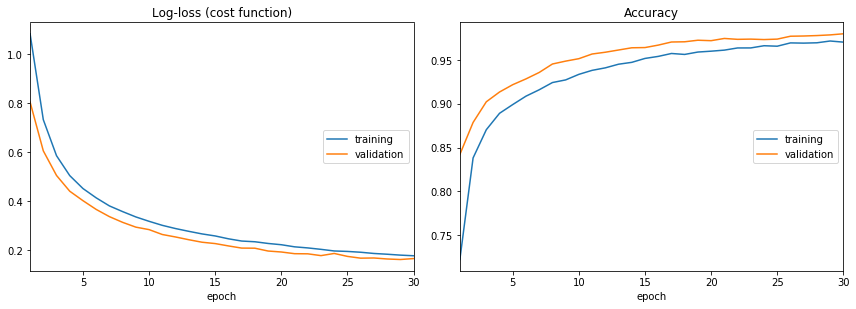

Log-loss (cost function):
training   (min:    0.177, max:    1.084, cur:    0.177)
validation (min:    0.162, max:    0.805, cur:    0.166)

Accuracy:
training   (min:    0.722, max:    0.972, cur:    0.970)
validation (min:    0.842, max:    0.980, cur:    0.980)
Train score: 0.15582451478188214
Train accuracy: 0.9835951134569585
Validation score: 0.16569094022518488
Validation accuracy: 0.9799492385786802


In [11]:
inputs = Input(shape=(300,))
hidden1 = Dense(128, activation="relu", kernel_regularizer=l1(0.0003))(inputs)
dropout_1 = Dropout(0.3)(hidden1)
hidden2 = Dense(64, activation="relu")(dropout_1)
preds = Dense(1, activation="sigmoid")(hidden2)

model3 = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model3.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model3.fit(X_train, y_train, batch_size=None, epochs=30, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model3.evaluate(X_train, y_train, verbose=0)
score_val = model3.evaluate(X_val, y_val, verbose=0)

score_test = model3.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

In [12]:
model3.save_weights('Guitar_onset_spectral_300_NN_weights.h5')
with open('Guitar_onset_spectral_300_NN_architecture.json', 'w') as f:
    f.write(model3.to_json())

In [65]:
y = load_file("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", 8000)

In [66]:
results = apply_window(y, size=300, disp=100, function=model3.predict, convert=True, temp=False)
results = np.array(results)

In [67]:
final3 = []
for x in results:
    final3.append([x[0], x[1][0][0]])
final3 = np.array(final3)

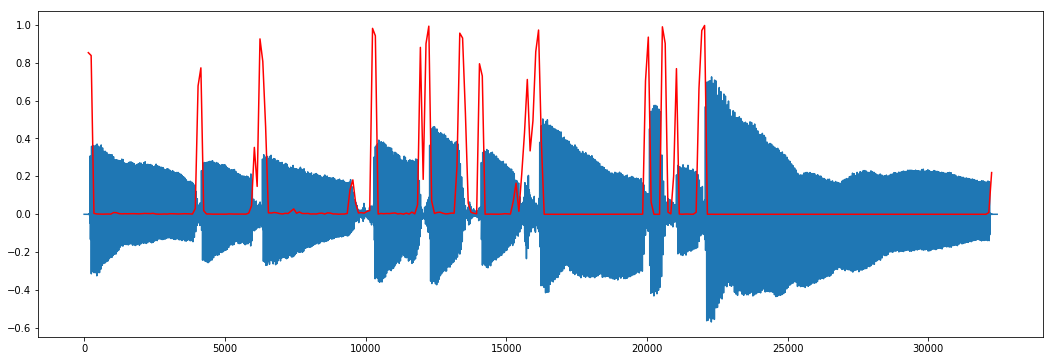

In [68]:
plt.figure(figsize=(18,6))
plt.plot(y*3)
plt.plot(final3[:,0]+150, final3[:,1], 'r')

## Broad spectral

In [9]:
data = pd.read_pickle("../Data/Guitar/acc-onset-data-spectral-600.pkl")
data = data.reset_index(drop=True)

In [10]:
%run ../Utilities/Utilities.ipynb

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

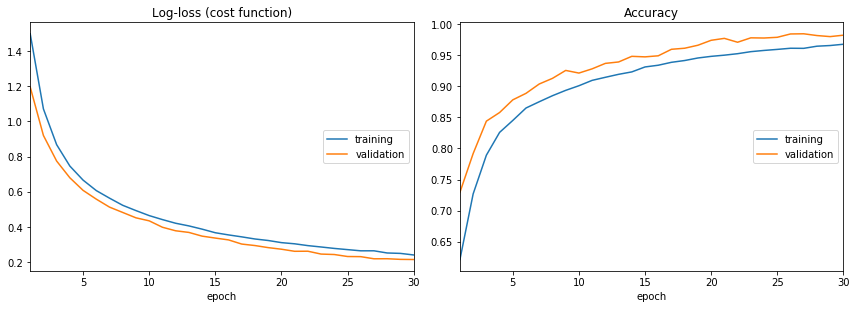

Log-loss (cost function):
training   (min:    0.241, max:    1.497, cur:    0.241)
validation (min:    0.215, max:    1.195, cur:    0.215)

Accuracy:
training   (min:    0.621, max:    0.967, cur:    0.967)
validation (min:    0.729, max:    0.984, cur:    0.982)
Train score: 0.20194486921067772
Train accuracy: 0.9858113367772982
Validation score: 0.21503488601367535
Validation accuracy: 0.9818850834984433


In [12]:
inputs = Input(shape=(600,))
hidden1 = Dense(128, activation="relu", kernel_regularizer=l1(0.0003))(inputs)
dropout_1 = Dropout(0.3)(hidden1)
hidden2 = Dense(64, activation="relu")(dropout_1)
preds = Dense(1, activation="sigmoid")(hidden2)

model4 = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model4.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model4.fit(X_train, y_train, batch_size=None, epochs=30, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model4.evaluate(X_train, y_train, verbose=0)
score_val = model4.evaluate(X_val, y_val, verbose=0)

score_test = model4.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

In [13]:
model4.save_weights('Guitar_onset_spectral_600_NN_weights.h5')
with open('Guitar_onset_spectral_600_NN_architecture.json', 'w') as f:
    f.write(model4.to_json())

In [74]:
y = load_file("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", 8000)

In [78]:
results = apply_window(y, size=600, disp=100, function=model4.predict, convert=True, temp=False)
results = np.array(results)

In [79]:
final4 = []
for x in results:
    final4.append([x[0], x[1][0][0]])
final4 = np.array(final4)

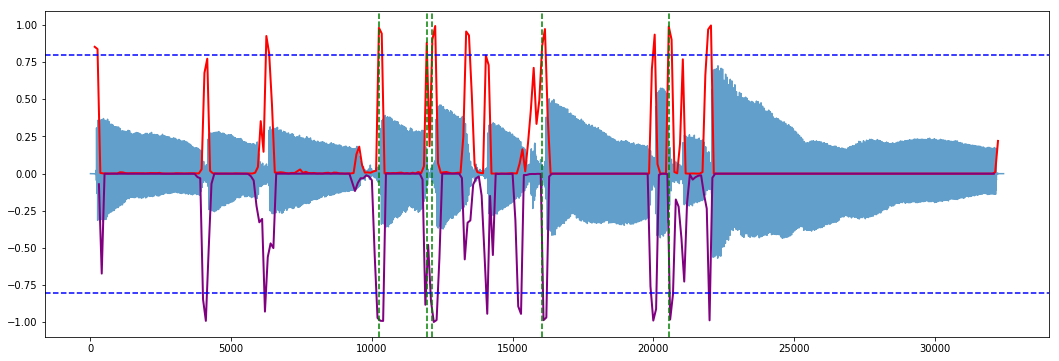

In [80]:
plt.figure(figsize=(18,6))
plt.plot(y*3, alpha=.7)
plt.plot(final3[:,0]+150, final3[:,1], 'r', linewidth=2)
plt.plot(final4[:,0]+300, final4[:,1]*(-1), 'purple', linewidth=2)
plt.axhline(y=0.8, color="b", linestyle='--')
plt.axhline(y=-0.8, color="b", linestyle='--')
for narrow, broad in zip(final3, final4):
    if (broad[1] >= 0.8) and (narrow[1] >= 0.8):
        plt.axvline(x=narrow[0]+150, color='g', linestyle='--')

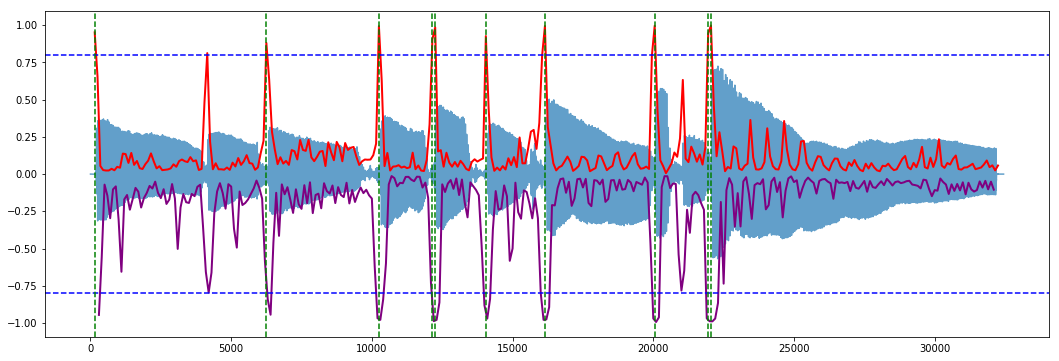

In [39]:
plt.figure(figsize=(18,6))
plt.plot(y*3, alpha=.7)
plt.plot(final[:,0]+150, final[:,1], 'r', linewidth=2)
plt.plot(final2[:,0]+300, final2[:,1]*(-1), 'purple', linewidth=2)
plt.axhline(y=0.8, color="b", linestyle='--')
plt.axhline(y=-0.8, color="b", linestyle='--')
for narrow, broad in zip(final, final2):
    if (broad[1] >= 0.8) and (narrow[1] >= 0.8):
        plt.axvline(x=narrow[0]+150, color='g', linestyle='--')

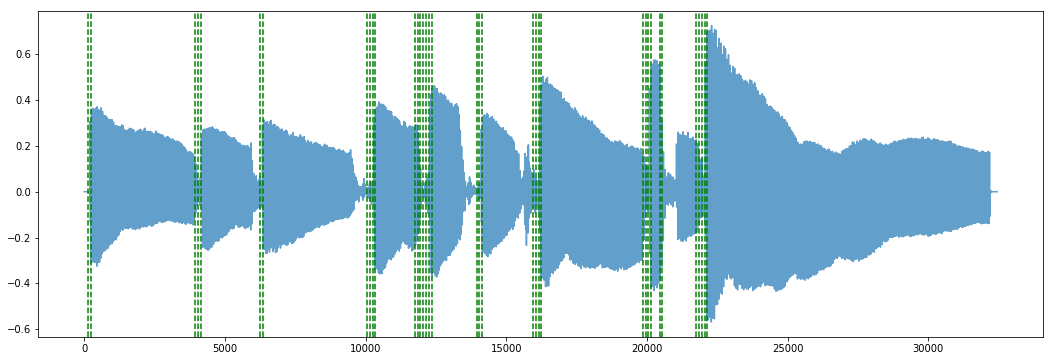

In [63]:
plt.figure(figsize=(18,6))
plt.plot(y*3, alpha=.7)
previous = np.array([])
all_onsets = []
for narrow_temp, broad_temp, narrow_spectral, broad_spectral in zip(final, final2, final3, final4):
    preds = np.append(previous, np.array([broad_temp[1], narrow_temp[1], broad_spectral[1], narrow_spectral[1]]))
    previous = np.array([broad_temp[1], narrow_temp[1], broad_spectral[1], narrow_spectral[1]])
    if ((preds >= 0.8).sum() >= 3) or ((preds >= 0.9).sum() >= 1):
        plt.axvline(x=narrow_temp[0]+150, color='g', linestyle='--')
        all_onsets.append(narrow_temp[0]+150)

In [66]:
final_onsets = []
for i in range(len(all_onsets) - 1):
    if all_onsets[i+1] - all_onsets[i] > 100:
        final_onsets.append(all_onsets[i])
final_onsets.append(all_onsets[-1])

In [67]:
final_onsets

[250.0,
 4150.0,
 6350.0,
 10350.0,
 12350.0,
 14150.0,
 16250.0,
 20150.0,
 20550.0,
 22150.0]

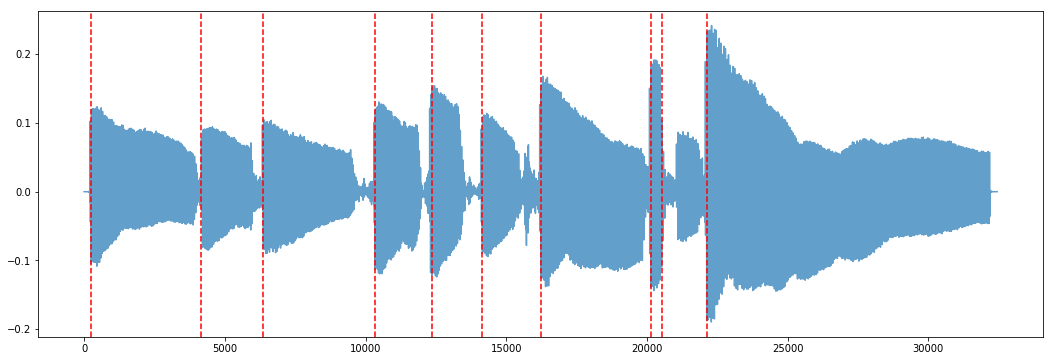

In [68]:
plt.figure(figsize=(18,6))
plt.plot(y, alpha=.7)
for o in final_onsets:
    plt.axvline(x=o, color='r', linestyle='--')

## XL Data

Running this was insane and the results were not good. **Better skip this!**

In [17]:
data = pd.read_pickle("../Data/Guitar/temp.pkl")

In [18]:
data.shape

(5996375, 201)

In [19]:
data_ = pd.read_pickle("../Data/Guitar/temp2.pkl")

In [20]:
data = data.append(data_)

In [21]:
data.shape

(6286916, 201)

In [22]:
data.head()

,Onset,x0,x1,x10,x100,x101,x102,x103,x104,x105,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1,6.945368e-11,-1.051609e-10,1.336038e-10,-3.205574e-05,-5.435983e-05,-3.958878e-07,-4.503499e-07,0.000014,-0.000007,...,-3.878044e-05,-0.000009,-3.084341e-05,-0.000014,-1.147940e-05,1.440708e-06,4.620567e-08,-2.635138e-05,-2.552828e-05,1.164346e-06
1,1,1.492790e-10,-1.997504e-10,-3.703868e-10,-3.958878e-07,-4.503499e-07,1.431608e-05,-6.642776e-06,-0.000019,0.000007,...,-3.084341e-05,-0.000014,-1.147940e-05,0.000001,4.620567e-08,-2.635138e-05,-2.552828e-05,1.164346e-06,-3.205574e-05,-5.435983e-05
2,1,2.528113e-10,-3.035270e-10,-1.197736e-09,1.431608e-05,-6.642776e-06,-1.898237e-05,7.477337e-06,0.000042,0.000014,...,-1.147940e-05,0.000001,4.620567e-08,-0.000026,-2.552828e-05,1.164346e-06,-3.205574e-05,-5.435983e-05,-3.958878e-07,-4.503499e-07
3,1,3.412894e-10,-3.564821e-10,-2.226117e-09,-1.898237e-05,7.477337e-06,4.232486e-05,1.396539e-05,0.000008,0.000044,...,4.620567e-08,-0.000026,-2.552828e-05,0.000001,-3.205574e-05,-5.435983e-05,-3.958878e-07,-4.503499e-07,1.431608e-05,-6.642776e-06
4,1,3.358236e-10,-2.683475e-10,-3.084448e-09,4.232486e-05,1.396539e-05,7.978076e-06,4.368255e-05,-0.000007,-0.000031,...,-2.552828e-05,0.000001,-3.205574e-05,-0.000054,-3.958878e-07,-4.503499e-07,1.431608e-05,-6.642776e-06,-1.898237e-05,7.477337e-06


In [ ]:
data.index = data.index.reindex([_ for _ in range(data.shape[0])])[0]

Shuffle rows

In [ ]:
data = data.sample(frac=1)

In [ ]:
data = data.drop([_ for _ in range(int(data.shape[0]/2))])

In [3]:
data = pd.read_pickle("../Data/Guitar/temp-sample.pkl")

In [4]:
data.shape

(3143458, 201)

In [6]:
data.index = data.index.reindex([_ for _ in range(data.shape[0])])[0]

In [4]:
data = data.drop(data[data["Onset"] == 0].sample(2200000).index)

In [7]:
data = data.drop([_ for _ in range(data.shape[0]-50000)])

In [8]:
data.shape

(50000, 201)

In [5]:
data[data["Onset"] == 1].shape[0]/data.shape[0]

0.46946127967540685

In [9]:
%run ../Utilities/Utilities.ipynb

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

In [8]:
inputs = Input(shape=(300,))
hidden1 = Dense(128)(inputs)
hidden2 = Dense(64, activation="relu")(hidden1)
preds = Dense(1, activation="sigmoid")(hidden2)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=50, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

Instructions for updating:
Use tf.cast instead.


KeyboardInterrupt: 

In [62]:
score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

Train score: 0.38875600481033323
Train accuracy: 0.86875
Validation score: 0.3485904459953308
Validation accuracy: 0.8900000009536743


In [17]:
model.save_weights('Guitar_onset_NN_weights.h5')

In [18]:
with open('Guitar_onset_NN_architecture.json', 'w') as f:
    f.write(model.to_json())